In [11]:
import numpy as np 
import torch
import torchvision
from torchvision import models
from torchvision import transforms
from PIL import Image
import matplotlib.pyplot as plt

In [12]:
use_pretrained=True
net=models.vgg16(pretrained=use_pretrained)
net.eval()
print(net)


VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [14]:
class BaseTransform():
    def __init__(self,resize,mean,std):
        self.base_transform =transforms.Compose([
            transforms.Resize(resize),
            transforms.CenterCrop(resize),# cat theo resize 
            transforms.ToTensor(), #chuyen ve tensor
            transforms.Normalize(mean,std) # chuyen ve dang tieu chuan
            ])
    def __call__(self,img):
        return self.base_transform(img)

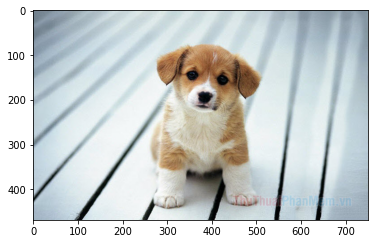

In [15]:
image_file="./cho.jpg"
image=Image.open(image_file)
plt.imshow(image)
plt.show()

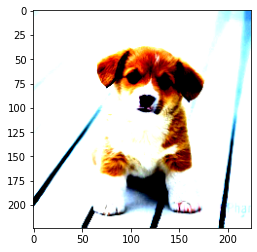

In [16]:
resize=224
mean=[0.485,0.456,0.406]
std=[0.229,0.224,0.225]
Transform=BaseTransform(resize,mean,std)# tao ra transform
img_transform=Transform(image) # transform anh input
#(chanels,height, width)=(height,width,chanels)
#clip (0,1) chuyen gia tri pixel tu 0->255 thanh 0->1
img_transform=img_transform.numpy().transpose(1,2,0) 
img_transform=np.clip(img_transform,0,1)
plt.imshow(img_transform)
plt.show()
